In [ ]:
import pandas as pd
from datasets import load_dataset

In [ ]:
labels = {
    0: "no emotion",
    1: "joy",
    2: "sadness",
    3: "surprise",
    4: "fear",
    5: "anger",
}
ru_labels = ["отсутствие эмоции", "радость", "грусть", "удивление", "страх", "злость"]

In [ ]:
dataset = load_dataset("cedr")

No config specified, defaulting to: cedr/main
Found cached dataset cedr (/home/seara/.cache/huggingface/datasets/cedr/main/0.1.1/117570489cbabbdf8de619bd31918a1cd680a7f286b89d04af340d0691dc2d66)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 7528
    })
    test: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 1882
    })
})

In [ ]:
dataset["train"].train_test_split(test_size=941)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 6587
    })
    test: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 941
    })
})

In [ ]:
dataset["train"].features

{'text': Value(dtype='string', id=None),
 'labels': Sequence(feature=ClassLabel(names=['joy', 'sadness', 'surprise', 'fear', 'anger'], id=None), length=-1, id=None),
 'source': Value(dtype='string', id=None)}

In [ ]:
df_cedr_train = pd.DataFrame(dataset["train"])
df_cedr_test = pd.DataFrame(dataset["test"])
print("train,", "размер", df_cedr_train.shape)
print("test,", "размер", df_cedr_test.shape)
display(df_cedr_train.head(5))
# display(df_cedr_test.head(5))

train, размер (7528, 3)
test, размер (1882, 3)


,text,labels,source
0,Суровый гималайский медведь .,[],lj
1,"Так, обнаружено несколько проблем с дисплеем (...",[],lenta
2,У меня остается только один вопрос - является ...,[2],lj
3,Забавно как люди в возрасте удивляются входящи...,[0],twitter
4,"Издание The Register отмечает, что у владельце...",[],lenta


In [ ]:
df_cedr_train["Length words"] = df_cedr_train["text"].apply(lambda x: len(x.split()))
df_cedr_train["Length"] = df_cedr_train["text"].apply(len)

In [ ]:
df_cedr_train["Length words"].mean()

14.815223166843783

In [ ]:
df_cedr_train["Length"].mean()

92.63044633368757

In [ ]:
pd.DataFrame(df_cedr_train["labels"].value_counts())

,labels
[],3043
[0],1508
[1],1365
[2],568
[3],553
[4],384
"[0, 2]",27
"[1, 4]",13
"[1, 3]",12
"[1, 0]",9


In [ ]:
df_cedr_train["labels_processed"] = df_cedr_train["labels"].apply(lambda x: [i + 1 for i in x] if x else [0])
df_cedr_train["labels_processed"]

0       [0]
1       [0]
2       [3]
3       [1]
4       [0]
       ... 
7523    [5]
7524    [1]
7525    [2]
7526    [0]
7527    [3]
Name: labels_processed, Length: 7528, dtype: object

<AxesSubplot: xlabel='Количество элементов', ylabel='Класс'>

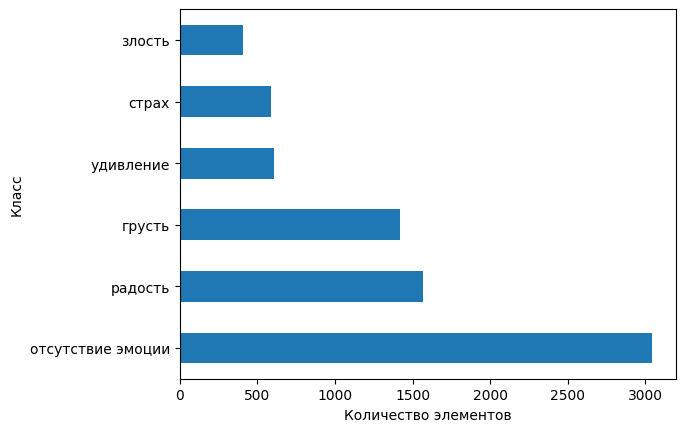

In [ ]:
frequency = pd.Series([ru_labels[x] for item in df_cedr_train["labels_processed"] for x in item]).value_counts()
frequency.plot.barh(xlabel="Количество элементов", ylabel="Класс")

In [ ]:
pd.DataFrame(df_cedr_train["source"].value_counts())

,source
twitter,2787
lj,2446
lenta,2295


In [ ]:
emotions = pd.DataFrame(labels.items(), columns=["Номер", "Эмоция"])
emotions["Перевод"] = ru_labels
emotions

,Номер,Эмоция,Перевод
0,0,no emotion,отсутствие эмоции
1,1,joy,радость
2,2,sadness,грусть
3,3,surprise,удивление
4,4,fear,страх
5,5,anger,злость


In [ ]:
df = []
for key, value in labels.items():
    if key == 0:
        df.append(
            df_cedr_train[df_cedr_train["labels"].isin([[]])].sample(1).drop(["labels", "source"], axis=1).values[0][0]
        )
    else:
        df.append(
            df_cedr_train[df_cedr_train["labels"].isin([[key - 1]])]
            .sample(1)
            .drop(["labels", "source"], axis=1)
            .values[0][0]
        )
df = pd.DataFrame(dict(zip(ru_labels, df)).items(), columns=["Эмоция", "Пример"])
df

,Эмоция,Пример
0,отсутствие эмоции,Ну собственно это не удивительно.
1,радость,“ Новогодняя ёлка :) #radiorecord ” Ужас!
2,грусть,"Сижу 20 часов в твиттере, чтобы сказать чтоб он там завязывал злиться и обижаться на меня :("
3,удивление,"«В Disney что, только что подтвердили, что Пиноккио мертв внутри?» — недоумевал @BrightRistar."
4,страх,"То ужасное чувство, когда задача решается через дискриминант, а он меньше нуля.. :|"
5,злость,"Клинтон добавил, что его приводит в ярость политика президента США Дональда Трампа в области климата, а также он гневается на европейских лидеров, которые не приняли в свои страны мигрантов из Сирии."


In [ ]:
pd.set_option("display.max_columns", 2)
pd.set_option("display.expand_frame_repr", True)
pd.set_option("max_colwidth", 200)